In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pt

In [2]:
training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [4]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [5]:
training.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [6]:
df_numerical = training[['Age', 'SibSp','Parch','Fare']]
df_catagorical = training[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

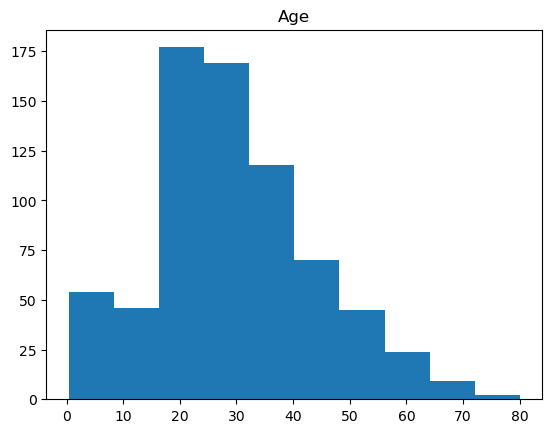

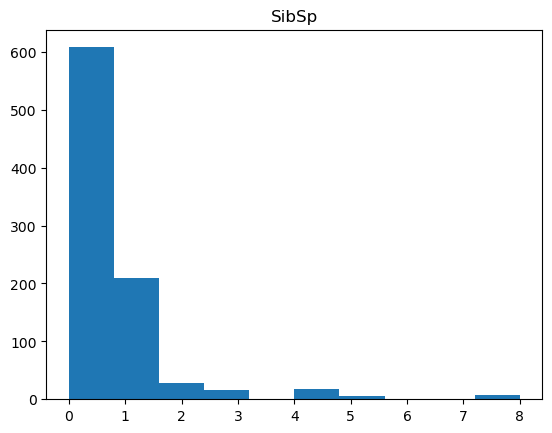

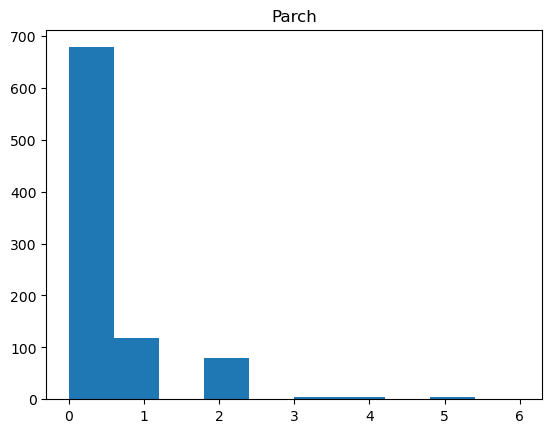

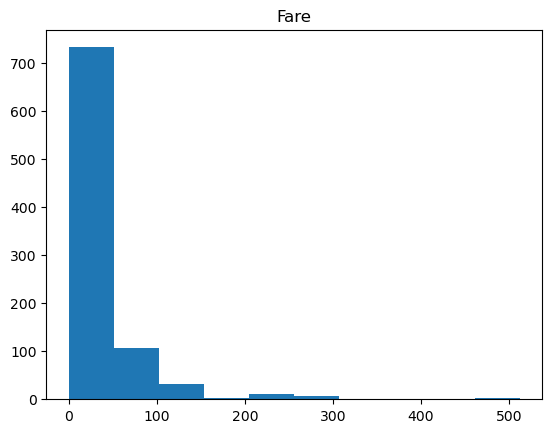

In [7]:
for i in df_numerical.columns:
    pt.hist(df_numerical[i])
    pt.title(i)
    pt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

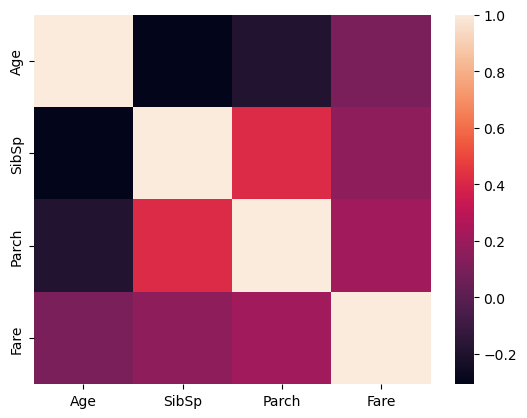

In [8]:
print(df_numerical.corr())
sns.heatmap(df_numerical.corr())

In [9]:
pd.pivot_table(training, index= 'Survived', values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [10]:
#for i in df_catagorical.columns:
   #sns.barplot(df_catagorical[i].value_counts().index).set_title(i)
    #sns.barplot(df_catagorical[i].value_counts().index).set_title(i)
    #pt.show()
    #Data is too messy need to do some feature engineering to make displaying the data easier

In [11]:
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index= 'Survived', columns= 'Embarked', values='Ticket', aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [12]:
#Questions to ask to explore more about the data provided
#1) Cabin - Simplify cabins (evaluated if cabin letter (cabin_adv) or the purchase of tickets across 
#multiple cabins (cabin_multiple) impacted survival)
#2) Tickets - Do different ticket types impact survival rates?
#3) Does a person's title relate to survival rates?

In [13]:
df_catagorical.Cabin
training['cabin_multiple']= training.Cabin.apply(lambda x: 0 if pd.isna(x) 
                                                 else len(x.split(' ')))

training['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [14]:
pd.pivot_table(training, index= 'Survived', columns= 'cabin_multiple',
              values= 'Ticket', aggfunc= 'count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [15]:
training['cabin_adv']= training.Cabin.apply(lambda x: str(x)[0])

In [16]:
print(training.cabin_adv.value_counts())
pd.pivot_table(training, index='Survived',columns='cabin_adv', values= 'Name',
              aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [17]:
# we need to understand ticket values better
#so we try numeric vs non numeric
training['numeric_ticket'] = training.Ticket.apply(lambda x:1 if x.isnumeric() else 0)

training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(
    x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(
    x.split(' ')[:-1]) >0 else 0)

training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [18]:
#pd.set_option("max_rows", None)
#training['ticket_letters'].value_counts()

In [19]:
#difference in numerical and non-numeric tickets in survival rate
pd.pivot_table(training, index= 'Survived',columns='numeric_ticket',
              values= 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [20]:
pd.pivot_table(training, index='Survived', columns='ticket_letters',
              values= 'Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [21]:
#feature engineering on person's title
training.Name.head(50)
training['name_title'] = training.Name.apply(
    lambda x: x.split(',')[1].split('.')[0].strip())

In [22]:
training['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

In [23]:
#Next we do Data Preprocessing
#1) Drop NUll values from Embarked
#2) Include only relevant variables
#3) Do catagorical transforms on all data. Normally we just use transformer, 
#but using this approach we can ensure our training and test data will have the
# same columns
#4) Impute data with mean (and median) for fare and age
#5) Normalize fare with logarithm to give more normal distribution
#6) Scale data from 0-1 with standard scaler

<Axes: >

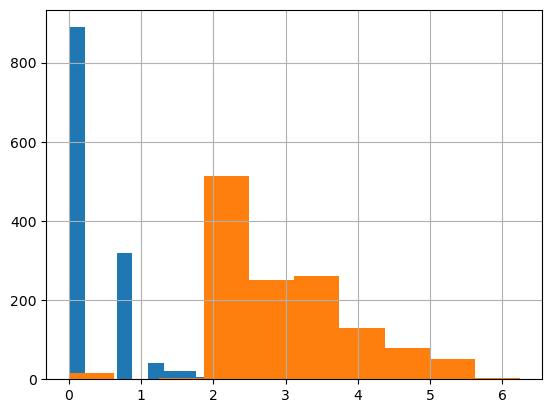

In [24]:
#3)create all catagorical variables for both training and testing sets

all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if
                                                 pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#4)impute null for all the continous data
all_data.Age = all_data.Age.fillna(training.Age.median())
all_data.Fare = all_data.Fare.fillna(training.Age.median())

#1)drop null Embarked rows, there are only 2 instances
all_data.dropna(subset=['Embarked'],inplace = True)

#5)do log norm of sibsp (not used but shown)
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

#5)do log norm of fare (used and shown)
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

In [25]:
#convert fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

#created dummy variables from catagories (Also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch',
                                      'norm_fare','Embarked','cabin_adv',
                                      'cabin_multiple','numeric_ticket',
                                      'name_title','train_test']])
#Split to train test again
x_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'],
                                                       axis = 1)
x_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'],
                                                      axis = 1)

y_train = all_data[all_data.train_test == 1].Survived
y_train.shape

(889,)

In [26]:
#Now we scale data
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()
all_dummies_scaled = all_dummies.copy()

all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])

all_dummies_scaled

x_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(
['train_test'], axis = 1)

x_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(
['train_test'], axis = 1)

y_train = all_data[all_data.train_test == 1].Survived

In [27]:
#model building see how different model perform with default parameters

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [28]:
#Using Naive Bayes as our baseline for classification tasks
gnb = GaussianNB()
cv  = cross_val_score(gnb, x_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [29]:
#using logistic regression with x train
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, x_train, y_train, cv=5)
print('The cv score for logistic regression with x train', cv)
print('The cv score for logistic regression with x train mean',cv.mean())

The cv score for logistic regression with x train [0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
The cv score for logistic regression with x train mean 0.8223068621849807


In [30]:
#using logistic regression with x train scaled
lr = LogisticRegression(max_iter = 2000)
cv2= cross_val_score(lr,x_train_scaled,y_train, cv=5)
print('The cv score for logistic regression with x train scaled', cv2)
print('The cv score for logistic regression with x train mean scaled',cv2.mean())

The cv score for logistic regression with x train scaled [0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
The cv score for logistic regression with x train mean scaled 0.8223068621849807


In [31]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75842697 0.74719101 0.8258427  0.74719101 0.8079096 ]
0.7773122579826065


In [32]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,x_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75842697 0.74719101 0.8258427  0.74719101 0.8079096 ]
0.7773122579826065


In [33]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[nan nan nan nan nan]
nan


E:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\anaconda\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "E:\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
  

In [34]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,x_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[nan nan nan nan nan]
nan


E:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\anaconda\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "E:\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
  

In [35]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.79213483 0.84831461 0.73595506 0.82485876]
0.8020504030978227


In [36]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,x_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80337079 0.79213483 0.84831461 0.73595506 0.82485876]
0.8009268075922046


In [37]:
svc = SVC(probability = True)
cv = cross_val_score(svc,x_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.85393258 0.82022472 0.8258427  0.80337079 0.86440678]
0.8335555132355742


In [38]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,x_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80337079 0.80898876 0.85393258 0.78651685 0.80225989]
0.8110137751539389


In [39]:
from sklearn.ensemble import VotingClassifier
#Voting classifier takes all of the inputs and averages the results. 
#For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" 
#and the result is just a popular vote. 
#For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. 
#If a the average confidence is > 50% that it is a 1 
#it will be counted as such
voting_clf = VotingClassifier(estimators = [('lr',lr),('rf',rf),('gnb',gnb),('svc',svc),
                                           ('xgb',xgb)], voting = 'soft')

In [40]:
cv = cross_val_score(voting_clf, x_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.84269663 0.82022472 0.8258427  0.80337079 0.84745763]
0.8279184917158637


In [41]:
voting_clf.fit(x_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(x_test_scaled).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

In [42]:
#Model Tuned Performance
#Now we have baselines, we want to see if we can improve on individual model results

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [43]:
#simple performace reporting function

def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters ' + str(classifier.best_params_))

In [44]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
             'penalty' : ['l1', 'l2'],
             'C' : np.logspace(-4, 4, 20),
             'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv=5, verbose = True,
                   n_jobs = -1)

best_clf_lr = clf_lr.fit(x_train_scaled, y_train)

clf_performance(best_clf_lr, 'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8279375357074843
Best Parameters {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [45]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'],
                                 'gamma': [.1, .5, 1, 2, 5, 10],
                                 'C': [.1, 1, 10, 100, 1000]},
                                 
                                {'kernel': ['linear'],
                                 'C': [.1, 1, 10, 100, 1000]},
                                 
                                {'kernel': ['rbf'],
                                 'degree': [2, 3, 4, 5], 
                                'C': [.1, 1, 10, 100, 1000]}]

clf_svc = GridSearchCV(svc, param_grid = param_grid, cv=5, verbose = True,
                      n_jobs = -1)
best_clf_svc = clf_svc.fit(x_train_scaled, y_train)
clf_performance(best_clf_svc, 'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best Score: 0.8335555132355742
Best Parameters {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [46]:
#Because the total feature space is so large, 
#I used a randomized search to narrow down the paramters for the model. 
#I took the best model from this and did a more granular search 

rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, 
n_iter = 100, cv = 5, verbose = True, n_jobs = -1)

best_clf_rf_rnd = clf_rf_rnd.fit(x_train_scaled,y_train)

clf_performance(best_clf_rf_rnd,'Random Forest')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


E:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
270 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
115 fits failed with the following error:
Traceback (most recent call last):
  File "E:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "E:\anaconda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "E:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_para

Random Forest
Best Score: 0.8313019742271314
Best Parameters {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}


In [47]:
rf = RandomForestClassifier(random_state = 1)
param_grid = {'n_estimators': [400,450,500,550],
             'criterion': ['gini','entropy'],
             'bootstrap': [True],
             'max_depth': [15, 20, 25],
             'max_features': ['auto', 'sqrt', 10],
             'min_samples_leaf': [2,3],
             'min_samples_split': [2,3]}

clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, 
                            verbose = True, n_jobs = -1)

best_clf_rf = clf_rf.fit(x_train_scaled,y_train)

clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


E:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
190 fits failed with the following error:
Traceback (most recent call last):
  File "E:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "E:\anaconda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "E:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_par

Random Forest
Best Score: 0.8358027042468101
Best Parameters {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 550}


<Axes: >

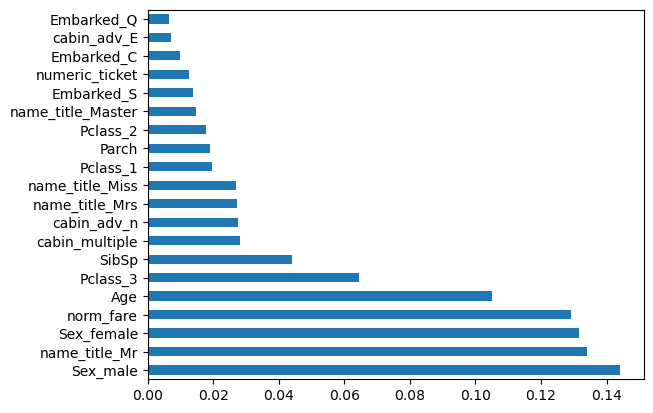

In [48]:
best_rf = best_clf_rf.best_estimator_.fit(x_train_scaled,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index= x_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [49]:
'''xgb = XGBClassifier(random_state= 1)

param_grid = {
    'n_estimators': [20, 50, 100, 250, 500, 1000],
    'colsample': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
    'learning_rate': [.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9],
    'gamma': [0, 0.01, 0.1, 10, 100],
    'min_child_weight': [0, 0.01, 0.1, 1, 10, 100],
    'sampling_method': ['uniform', 'gradient_based']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv=5, verbose= True,
                      n_jobs= -1)

best_clf_xgb = clf_xgb.fit(x_train_scaled, y_train)

clf_performance(best_clf_xgb, 'XGB')

clf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid,
                                n_iter = 1000, cv=5, verbose=True, n_jobs= -1)

best_clf_xgb_rnd = clf_xgb_rnd.fit(x_train_scaled, y_train)

clf_performance(best_clf_xgb_rnd, 'XGB')'''

"xgb = XGBClassifier(random_state= 1)\n\nparam_grid = {\n    'n_estimators': [20, 50, 100, 250, 500, 1000],\n    'colsample': [0.2, 0.5, 0.7, 0.8, 1],\n    'max_depth': [2, 5, 10, 15, 20, 25],\n    'reg_alpha': [0, 0.5, 1],\n    'reg_lambda': [1, 1.5, 2],\n    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],\n    'learning_rate': [.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9],\n    'gamma': [0, 0.01, 0.1, 10, 100],\n    'min_child_weight': [0, 0.01, 0.1, 1, 10, 100],\n    'sampling_method': ['uniform', 'gradient_based']\n}\n\nclf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv=5, verbose= True,\n                      n_jobs= -1)\n\nbest_clf_xgb = clf_xgb.fit(x_train_scaled, y_train)\n\nclf_performance(best_clf_xgb, 'XGB')\n\nclf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid,\n                                n_iter = 1000, cv=5, verbose=True, n_jobs= -1)\n\nbest_clf_xgb_rnd = clf_xgb_rnd.fit(x_train_scaled, y_train)\n\nclf_performance(best_clf_xgb_rnd, 'XGB')"

In [50]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True,
                       n_jobs = -1)
best_clf_xgb = clf_xgb.fit(x_train_scaled,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGB
Best Score: 0.849279502317019
Best Parameters {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 550, 'reg_alpha': 1, 'reg_lambda': 10, 'sampling_method': 'uniform', 'subsample': 0.65}


In [52]:
y_hat_xgb = best_clf_xgb.best_estimator_.predict(x_test_scaled).astype(int)

xgb_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_xgb}

submission_xgb = pd.DataFrame(data=xgb_submission)

submission_xgb.to_csv('xgb_submission3.csv', index=False)